# Entrega 4 - Análisis de datos (PCA, K-Means)

### Grupo 07:
     - Renzo Gambone C.I. 5.155.486-4
     - Germán Ouviña C.I. 4.823.566-1
     - Leandro Rodríguez C.I 4.691.736-4


## 1. Introducción
***
### 1.1. Objetivo
***
El objetivo de esta tarea fue analizar bajo distintos enfoques el corpus _aquienvoto.uy_. Más específicamente, se tuvieron en cuenta los siguientes lineamientos:
- Implementar un algoritmo de reducción de dimensionalidad (algoritmo PCA) para visualizar los datos.
- Implementar un modelo de aprendizaje no supervisado (algoritmo K-means) para agrupar los datos.
- Analizar los resultados intermedios generados en cada enfoque, buscando patrones y extrayendo información de utilidad en el proceso.
- Analizar los resultados finales generados en cada enfoque, contestando a las preguntas planteadas en el práctico y a otras surgidas de las observaciones del corpus.
- Enfocar dichos análisis desde un punto de vista cualitativo, teniendo en cuenta métricas cuantitativas con el fin de orientar dicho análisis.

### 1.2. Entrega
***
La entrega de esta tarea consta de dos grandes componentes:
- **Informe** en formato de Jupyter Notebook (este informe).
- **Programa** que permite analizar el conjunto de datos utilizando **PCA** o **KMeans**, generar distintas gráficas, evaluar el desempeño de los algoritmos utilizados, entre otras utilidades.

El objetivo del **informe** es centralizar la información relativa a los distintos métodos de análisis empleados, así como los resultados obtenidos y las conclusiones generadas. En esta ocasión, es posible ejecutar el código principal completamente desde el informe, agregandose las funciones necesarias en las secciones correspondientes (ver sección 1.3. Para una descripción detallada sobre el código encontrado en cada sección).

Por otra parte, el **programa** ofrece una interfaz en consola que permite la ejecución de ambos algoritmos acorde a las distintas configuraciones paramétricas, así como generar todos los datos mostrados en el informe. Si bien todas estas herramientas fueron pensadas para uso del grupo, en el archivo *README.md* se adjunta una sencilla guía de como utilizarlas.

A diferencia de las anteriores entregas, el **programa** y su interfaz se agregó como una herramienta puramente auxiliar. Como se mencionó anteriormente, es posible ejecutar el código principal en el **informe**. De todas formas, con el fin de facilitar la lectura, se redujo el uso de código dentro del informe lo máximo posible. Para un mayor entendimiento de los algoritmos empleados, referir a los archivos de código fuente.

### 1.3. Estructura
***
Dado que en esta ocasión el objetivo principal está en el **análisis** y no en la **construcción** de uno o varios modelos, tanto la estructura como las tareas realizadas difieren bastante con respecto a las anteriores entregas. A continuación se adjunta una breve introducción del contenido de cada sección:

- En la **Sección 2 (Enfoque)** se define y contrasta los dos grandes enfoques utilizados a lo largo de la tarea (reducción de dimensionalidad y aprendizaje no supervisado), manteniéndose dicha dualidad en el resto de secciones.
- En la **Sección 3 (Diseño)** se tratan los aspectos matemáticos y técnicos de cada enfoque, definiendo los algoritmos empleados, formas de evaluación generales, etc.
- En la **Sección 4 (Experimentación)** se define la metodología empleada a la hora de experimentar, así como el proceso de generación de resultados, los resultados en sí y el análisis posterior de los mismos. También se desarrolla una sección con información generada durante la investigación previa realizada en relación con el marco teórico del corpus, justificando la toma de decisiones de los distintos experimentos realizados. 
- En la **Sección 5 (Conclusiones)** se adjuntan las conclusiones generales obtenidas en el desarrollo de la tarea, organizándose las mismas según distintas subsecciones.


## 2. Enfoque
***
Como se mencionó en la sección anterior, el objetivo principal de la tarea es estudiar el corpus de _aquienvoto.uy_. El interés general radica en analizar la relación entre los potenciales votantes, buscando patrones en sus respuestas y enfocándose en el análisis cualitativo, es decir, priorizar las observaciones e interpretaciones de los datos.

Existen múltiples estrategias posibles para encarar dicho problema, por lo que a continuación se definen los dos enfoques utilizados:

### 2.1. Enfoque 1 - Reducción de Dimensionalidad
***
Por un lado, es posible analizar los datos sin utilizar ningún modelo de aprendizaje automático. Dado que el corpus cuenta con **26 atributos**, el primer enfoque se centra en la **reducción de dimensionalidad** del corpus en sí, buscando reducir la cantidad de dimensiones para poder visualizar los datos y buscar una relación entre votantes gráficamente.

Dicho enfoque puede presentar varios problemas, ya que para poder graficar los datos es necesario pasar de **26 dimensiones** a **2 dimensiones**, siendo factible una pérdida importante de información en el proceso. De hecho, dado un corpus específico, dependiendo de la técnica de reducción de dimensionalidad empleada y de la relación de los datos en sí, es posible determinar que tanto impactará la reducción de dimensiones en la integridad del corpus.

De todas formas, si el corpus cuenta con una estructura "resistente" a la reducción de dimensiones y el algoritmo utilizado es compatible con dicha estructura, sería posible observar o descartar patrones entre los votantes.

Tomando en cuenta lo anterior, existen múltiples técnicas de reducción de dimensionalidad. En el contexto de esta tarea se utilizará **PCA (Principal Component Analysis)**. En la sección 3.1 se especifican los aspectos técnicos de dicho algoritmo y en la sección 4.4 los resultados de la experimentación y análisis empleando dicha técnica.

### 2.2. Enfoque 2 - Aprendizaje no Supervisado (Clustering)
***
Por otra parte, es posible analizar los datos utilizando modelos de aprendizaje automático, más concretamente modelos que implementen técnicas de **clustering** o **agrupamiento**, siendo está una forma de **aprendizaje no supervisado**.

Dicho enfoque genera distintos grupos de votantes, basándose en su distribución en un espacio de **26 dimensiones**. Dependiendo de la naturaleza del corpus, esto puede generar problemas. Al igual que en el anterior enfoque, es posible determinar la cantidad óptima de grupos a generar (ya que a priori, esta es desconocida).

Tomando en cuenta lo anterior, existen múltiples técnicas de clustering. En el contexto de esta tarea se utilizará **K-Means**. En la sección 3.2 se especifican los aspectos técnicos de dicho algoritmo y en la sección 4.5 los resultados de la experimentación y análisis empleando dicha técnica.

## 3. Diseño
***
En esta sección se detallan las características del diseño utilizado para construir las herramientas de análisis para cada enfoque, profundizándose las estrategias y algoritmos empleados, así como otros puntos, como el procesamiento previo al análisis y/o entrenamiento y la evaluación posterior al mismo.

### 3.1. Enfoque 1 - Reducción de Dimensionalidad
***

#### 3.1.1. Algoritmo
***
Como se mencionó en la sección anterior, el algoritmo empleado para reducir las dimensiones del corpus fue **PCA**. Como su nombre indica, el algoritmo hace uso de los **componentes principales** de una matriz. Se define como componente principal de una matriz al mayor **valor propio** de la misma.

En términos generales, el algoritmo consiste en calcular $k$ componentes principales de cierta matriz, formar otra matriz con vectores propios correspondientes a cada componente principal y transformar el subespacio del corpus multiplicando cada vector del mismo por la matriz de vectores propios. Es importante destacar que $k$ es la cantidad de dimensiones que se quiere mantener, teniendo que ser entero positivo menor a la cantidad de dimensiones actual.

Dado que existen múltiples métodos para implementar **PCA**, la matriz que se obtiene y por ende los componentes principales de la misma dependen del método. No obstante, los resultados son ortogonales al método, es decir, la reducción de dimensionalidad obtenida es independiente al método utilizado.

Teniendo esto en cuenta, con el objetivo de validar métodos se implementaron dos formas distintas de **PCA**:

##### 3.1.1.1. Matriz de Covarianza
***

Sea un vector de atributos $A = [A_1, ..., A_n]$ y sea $\mu_i$ la media del atributo $A_i$, se define la **covarianza** entre dos atributos $A_i, A_j$ como la varianza conjunta de ambos atributos, utilizando la siguiente expresión:

$$ Cov(A_i, A_j) = E((A_i - \mu_i)(A_j - \mu_j)) $$

En cierta forma, la **covarianza** entre $A_i$ y $A_j$ representa la relación entre la varianza de ambos atributos por separado. Una **covarianza positiva** indica que ambos atributos crecen de forma _directamente proporcional_, mientras que una **covarianza negativa** indica que ambos atributos crecen de forma _inversamente proporcional_.

De esta forma, la **matriz de covarianza** $M$ de un conjunto de datos $D$ con un vector de atributos $A$ se define como la covarianza de cada posible par de atributos de $A$, utilizando la siguiente expresión:

$$M(D,A) = (Cov(A_i,A_j))_{ij} : 1 \leq i, j \leq |A| $$

Como se mencionó anteriormente, **PCA** utiliza los componentes principales de una matriz para reducir la dimensión del subespacio que el corpus representa. En este método, la matriz empleada es nada más y nada menos que la **matriz de covarianza** para el corpus $D$ y sus atributos $A$.

Teniendo esto en cuenta, el algoritmo implementado consiste en los siguientes pasos:
1. Sustraer la media $\mu_i$ para cada atributo $A_i$ del conjunto de datos (esto transforma al corpus en un conjunto de datos con media 0 para cada atributo).
2. Calcular la **matriz de covarianza** $M(D,A)$.
3. Calcular los **valores propios** de $M(D,A)$ y obtener un **vector propio** para cada valor.
4. Elegir los $k$ **componentes principales** de $M(D,A)$ y formar la matriz $W$ con los $k$ vectores propios correspondientes a los valores propios elegidos (y en el orden adecuado).
5. Sea $D$ la matriz que representa al corpus original, se calcula $T = DW$, teniendo esta $k$ dimensiones.


##### 3.1.1.2. Descomposición SVD
***

Otro potencial método para obtener una matriz de la cual extraer los componentes principales es la **descomposición SVD** o **descomposición en valores singulares**. 

Sea $M \in R_{m \times n}$ una matriz, su descomposición SVD se define como una factorización del tipo $M = USV$ donde $U,S,V$ son matrices que cumplen las siguientes propiedades:
- La matriz $U \in R_{m \times m}$ está formada por vectores propios de $M . M^t$, siendo $U$ ortonormal.
- La matriz $V \in R_{n \times n}$ está formada por vectores propios de $M^t . M$, siendo $V$ ortonormal.
- La matriz $S \in R_{m \times n}$ está formada por los **valores singulares** de $M$ en su diagonal principal ordenados de mayor a menor.

Cabe destacar que los **valores singulares** de una matriz son las raíces cuadradas de sus **valores propios** por lo que el mayor valor singular de una matriz es la raíz cuadrada del componente principal de dicha matriz.

El método implementado se sirvió de obtener los valores propios de la matriz de covarianza, utilizando luego aritmética de matrices para obtener una matriz $T$ que represente al corpus $D$ con dimensionalidad reducida.

Dado que el método con **SVD** no aporta más que una validación a la hora de comparar con el método anterior, no se entrará en detalles de su implementación. Para ver dicha implementación, referir al código fuente del módulo _pca.py_.

#### 3.1.2. Evaluación
***

Los algoritmos de reducción de dimensionalidad tienen distinto rendimiento dependiendo de su forma de operar y del conjunto de datos sobre el que trabajen. En cualquier caso, cuanto más se reducen las dimensiones de un corpus, más información se pierde.

Normalmente, al momento de reducir las dimensiones de un conjunto de datos utilizando **PCA**, surge la necesidad de decidir cuántas componentes se van a considerar para que no se pierda el significado que contienen los datos en sí. Para esto se suele calcular una métrica denominada **ratio de varianza explicada**, la cual permite determinar en términos generales la pérdida de información provocada al reducir las dimensiones para cada posible $k$ que se tome. De esta forma, dependiendo de donde se ponga el límite, el menor $k$ que supere ese límite sería la cantidad "ideal" de componentes a tomar.

Para calcular el **ratio de varianza explicada** se procesan los valores propios, calculándose la suma acumulativa para cada cantidad de componentes consideradas en cada caso. De esta forma, para cierto $k$, se obtiene que esta métrica representa la suma de los $k$ componentes principales sobre la suma de todos los valores propios. Cuanto mayor es este valor, mejor es esa elección de $k$. Lógicamente, cuanto mayor es $k$, mayor es el ratio de varianza explicada (de hecho, es creciente).

En este contexto en particular, se sabe que el interés de utilizar **PCA** es reducir a **2 dimensiones**, fijando $k = 2$. No obstante, utilizando el **ratio de varianza explicada**, se puede conocer que tanta información se está perdiendo. En la sección de experimentación 4.4 se muestran los resultados de la evaluación de **PCA** y sus implicancias.



### 3.2. Enfoque 2 - Aprendizaje no Supervisado (Clustering)
***

#### 3.2.1. Modelo
***
Las técnicas de **aprendizaje no supervisado** difieren sustancialmente de las técnicas implementadas en anteriores entregas, las cuales son del grupo de técnicas de **aprendizaje supervisado**. En esencia, el aprendizaje supervisado utiliza para entrenar un conjunto de datos con clasificación conocida, mientras que el aprendizaje no supervisado, en lugar de vincular elementos del conjunto con su clasificación, se concentra en observar patrones e irregularidades en la distribución de los elementos en el espacio comprendido por sus atributos.

Dentro de las técnicas de aprendizaje no supervisado, existe una que se denomina **clustering**, la cual tiene como objetivo agrupar los elementos del conjunto de datos en subconjuntos disjuntos denominados **clusters**, los cuales agrupan elementos similares de alguna forma en cuanto a sus atributos, siguiendo distintas nociones dependiendo del modelo implementado.

Cabe mencionar que los resultados obtenidos no necesariamente reflejan conclusiones que sean de valor para un clasificador, sino que los mismos están orientados netamente hacia la distribución de los elementos en el conjunto de atributos. Observar como los elementos están distribuidos no es trivial para un corpus con alta dimensionalidad, pero permite destacar anomalías en el conjunto y agrupar ejemplos "similares". Por otra parte, es posible que la agrupación en clusters esté vinculada con la clasificación de los elementos de un cluster, sin embargo esta presunción no puede realizarse sin la experimentación adecuada.

Teniendo en cuenta las generalidades anteriormente descritas, en el contexto de esta tarea se implementó el modelo de **clustering** denominado **K-Means Clustering** (a partir de ahora denominado **K-Means**), el cual representa el conjunto de datos como un espacio de **$n$ dimensiones** (siendo $n$ la cantidad de atributos) e itera sobre el mismo, buscando determinar los anteriormente mencionados **clusters**.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento.
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$.
* $KMeans_{(D,k)} =$ Agrupación del conjunto $D$ en $k$ clusters, los cuales son representados por sus **centroides**, los cuales son coordenadas en el espacio de los atributos que determinan la posición espacial de cada cluster.
* Para un ejemplo $d \in D$, es posible determinar a que cluster pertenece asociándolo al cluster cuyo centroide esté más próximo a el mismo.

Los detalles sobre el algoritmo de entrenamiento y de agrupación de nuevos ejemplos se expanden en la siguiente sección.

#### 3.2.2. Algoritmo
***

##### 3.2.2.1. Algoritmo de entrenamiento
***
El algoritmo **K-Means** implementado sigue los lineamientos del visto en el teórico, por lo que no es necesario aclarar ninguna particularidad de su implementación, más que el hecho de que el umbral de variación entre los centroides obtenidos en una iteración y el siguiente debe ser de 0.0001 o menor para que el algoritmo considere haber terminado.

##### 3.2.2.2. Algoritmo de agrupación
***
Con el objetivo de separar conceptualmente de la clasificación vista en modelos de aprendizaje supervisado, se le denomina **agrupación** a determinar el cluster al que debería pertenecer un nuevo ejemplo que no se encontraba en el conjunto de datos original.

Dada la naturaleza de **K-Means**, el algoritmo de agrupación es posible y ligero en términos de computo. Consiste en simplemente calcular la distancia euclídea del ejemplo a agrupar para cada uno de los centroides de cada cluster. Aquel centroide que se encuentre más cerca del ejemplo, representará al cluster al que dicho ejemplo pertenece.

Es crucial mencionar que nuevos ejemplos podría afectar a los clusters generados originalmente, cambiando la distribución de ejemplos e incluso la ubicación de los centroides. Por ende, para ciertos escenarios es incorrecto utilizar este enfoque de agrupación de nuevos ejemplos y debe correrse el algoritmo de entrenamiento otra vez. Dado que la implementación para esta tarea no tiene en cuenta la agrupación de nuevos ejemplos en ningún punto, se consideró un enfoque posible. 

#### 3.2.4. Evaluación
***
Debido a que el aprendizaje no supervisado no apela a generar un clasificador y validarlo con un subconjunto de prueba, no es posible evaluar su rendimiento utilizando las métricas de tareas anteriores. De hecho, a priori no existe una clasificación "correcta".

Teniendo esto en cuenta, se evaluaron los potenciales problemas del modelo **K-Means** y se planteó el uso de distintas métricas para determinar que clusters agrupan mejor a los datos. A continuación se especifican dichos problemas:

##### 3.2.4.1. Problemas del modelo
***

**K-Means** tiene dos problemas principales:

* La función de costo a minimizar no es convexa, y por ende, tiene óptimos locales. A su vez el algoritmo **K-Means** tiene solamente componentes de *explotación* y no de *exploración*, por lo que es propenso a quedarse atrapado en el primer óptimo local que encuentre.

* La elección del número $k$ no es trivial para cada conjunto de datos. Un valor de $k$ bajo será más eficiente computacionalmente y tendrá una función de costo más fácil de optimizar, pero las agrupaciones en clusters no necesariamente reflejarán una clara distribución de los elementos en el conjunto. Por otra parte, un valor de $k$ alto puede tener una mayor cantidad de óptimos locales y puede subdividir el conjunto en más clusters de lo que realmente tiene sentido para la distribución del conjunto.

Sabiendo esto, en la experimentación se decidió implementar ciertas estrategias con el objetivo de palear la influencia de estos problemas, siendo las mismas:

* Realizar $n$ ejecuciones independientes del algoritmo (siendo $n$ un parámetro de entrada), manteniendo los resultados de mejor calidad, acorde a cierta métrica (la cual se define en la siguiente subsección). De esta forma se busca dar un componente de *exploración* al algoritmo.

* Realizar ejecuciones para distintos valores de $k$, estudiando su comportamiento en relación a la variación de $k$.

En la sección de experimentación 4.5 se profundiza sobre los enfoques tomados y los resultados obtenidos gracias a ello.

##### 3.2.4.2. Métricas empleadas
***

Para cuantificar la calidad del agrupamiento en clusters del algoritmo **K-Means** se emplearon dos métricas distintas que ofrecen distintas nociones sobre la calidad de los clusters elegidos. Las implementaciones de dichas métricas son las brindadas por la biblioteca *sklearn* de Python.

Es importante mencionar que, de cierta forma, estas métricas atentan contra la idea del aprendizaje no supervisado, ya que se utilizan clasificaciones conocidas para evaluar la calidad de los clusters. Dichas clasificaciones no siempre están disponibles y a veces ni siquiera existen. Sin embargo, en este contexto se cuenta con esos datos, por lo cual se utilizarán para encontrar patrones.

Las métricas son las siguientes:

###### 3.2.4.2.1. Silhouette
***
El **coeficiente de Silhouette** evalúa los resultados del modelo observando la densidad de cada cluster según la clasificación original de cada elemento. Un coeficiente alto se relaciona con que los resultados tienen clusters "bien definidos".

Dados los resultados:
* **a:** La distancia promedio entre una muestra y todos los otros puntos de la misma clase.
* **b:** La distancia promedio entre una muestra y todos los otros puntos en el cluster más próximo.

Se define el **coeficiente de Silhouette** como: $$s = \frac{b-a}{max(a,b)}$$

Para un conjunto de muestras, se toma el promedio general del **coeficiente de Silhouette** para cada muestra.

###### 3.2.4.2.2. Adjusted Random Index (ARI)
***
La métrica **ARI** se encuentra comprendida en el intervalo $[-1..1]$, y dadas dos listas con valores "reales" y "predecidos" mide la similaridad entre los elementos de las mismas, ignorando posibles permutaciones. En esencia, esta métrica es útil para comprobar si efectivamente cada cluster está vinculado con las clasificaciones originales del conjunto o con otros posibles agrupamientos conocidos.

A diferencia del *coeficiente de Silhouette*, esta métrica sólo tiene sentido para determinados valores de $k$ (valores a los cuales se pueda asociar una clasificación), dado que no evalúa según la densidad de cada cluster, sino según como el conjunto entero fue agrupado en clusters.

## 4. Experimentación
***
En esta sección se detallan los aspectos relacionados a las distintas pruebas realizadas, tratando tanto los lineamientos previos como los análisis realizados sobre los resultados.

### 4.1. Metodología
***

Dado el objetivo de buscar patrones en el corpus, se utilizó una metodología de experimentación particular, dividiéndola en las siguientes etapas:

1. **Investigación previa:** Al tratarse de un corpus con un contexto específico (posibles votaciones en elecciones nacionales), fue necesario realizar una investigación genérica sobre dicho contexto para poder evaluarlo lo mejor posible. En resumen, se investigó sobre generalidades de la política partidaria, análisis estadísticos en poblaciones de votantes, variables indicadoras, entre otros. En la sección 4.2 se profundiza la información recabada y los sesgos introducidos por la interpretación de la misma.
<br><br>
2. **Análisis del corpus:** Habiendo realizado el sondeo de información básica sobre el tema, se analizó la estructura del corpus, especulando sobre su correctitud. En la sección 4.3 se estudian las posibles ventajas y desventajas de esta estructura.
<br><br>
3. **Generación de resultados:** Una vez realizada la investigación y el análisis preliminar, se ejecutaron distintas configuraciones de ambos enfoques con el fin de observar los datos resultantes. En la sección 4.4 se expanden las elecciones de configuraciones utilizadas, la justificación de dichas elecciones, los resultados más importantes y se adjuntan los scripts que fueron implementados.
<br><br>
4. **Análisis de enfoques:** Teniendo los resultados generados, se realizó un estudio de los mismos con un enfoque de análisis cualitativo, utilizando los conocimientos generados en las etapas previas. Se analizaron métricas descriptivas de ambos algoritmos, también realizándose observaciones e interpretaciones de cada resultado. En la sección 4.5 se expanden estos puntos y se adjuntan los scripts necesarios para evaluar el desempeño del algoritmo utilizado y la calidad de los resultados analizados.

### 4.2. Marco Teórico
***

Dada la naturaleza del corpus, fue necesario emplear cierta cantidad de tiempo en realizar una investigación previa, con el objetivo de contextualizar el análisis. Por una parte, fue necesario investigar sobre generalidades de **política**, como el concepto de **partido político** y distintas formas de clasificar posturas dentro de diversos **espectros políticos**. Una vez se hubieron bajado a tierra dichos conceptos, fue necesario aplicarlos al contexto nacional y contemporáneo, investigando las propuestas de cada candidato.

Dado que no es el objetivo de esta tarea, no se entrará en detalles de los conceptos teóricos estudiados. En la sección 6 (Referencias) se adjuntan los textos utilizados en la investigación.

De esta forma, viendo a cada ejemplo del corpus como un **votante**, se determinaron 4 posibles agrupamientos de los mismos, con el fin de estudiar su distribución en el corpus y su relación con los atributos. De estos 4 grupos, los 2 primeros son **triviales** (no existe dos formas de interpretarlos), mientras que los últimos 2 son **sesgados** (se pueden interpretar de varias formas). Dichos grupos se generaron en base a los siguientes lineamientos:

1. **Candidatos:**
    
    El agrupamiento predefinido, donde existe un grupo por candidato y cada grupo contiene a los votantes de dicho candidato. Existen **24 candidatos**.


2. **Partidos:** 
    
    Otro agrupamiento trivial, donde existe un grupo por partido político y cada grupo contiene a los votantes de aquellos candidatos que pertenecen al partido. Dado que cada candidato pertenece a un único partido, no existe ambigüedad en la asignación de partidos a candidatos. Existen **11 partidos**.


3. **Espectro unidimensional:**

    El primero de los agrupamientos sesgados, denominándose así ya que la asignación de candidatos no es trivial ni única, pudiendo intrepretarse de varias formas. Este agrupamiento se fundamenta en los principios denominados **izquierda** y **derecha**, originados durante la revolución francesa y mantenidos a lo largo del tiempo. Si bien en ciertos ámbitos de la política se pueden considerar obsoletos, ambos grupos representan dos "extremos" de un espectro político unidimensional. 

    Originalmente, se consideraba de **derecha** a aquellos individuos que defendían el status qúo, mientras que los individuos de **izquierda** buscaban el cambio, entendiendo al status qúo como injusto y retrógrado. Con el paso del tiempo y el cambio rotundo en la organización de muchas sociedades del mundo, se empezó a considerar a la **derecha** como aquella ideología que defendía la existencia de las clases sociales y la desigualdad social, mientras que la **izquierda** es la ideología que se opone a dicha noción. Si bien los intereses que ambos grupos defienden varían dependiendo del contexto histórico y regional, la utilización de ambos términos para agrupar personas según esta ideología política prevalece, ya que a grandes rasgos captan la esencia de polos opuestos.

    Teniendo esto en cuenta, es importante marcar que si bien se oponen, existe un **espectro** de por medio, denominándose **extrema izquierda** y **extrema derecha** respectivamente a aquellas ideologías que no toman ninguna característica de la opuesta. Una postura que combina características de ambos extremos "en partes iguales" se denomina **central**, mientras que las tendencias del centro a cada extremo son denominadas **centroizquierda** y **centroderecha** respectivamente.
    
    De esta forma, y luego de investigar las posturas de cada candidato y partido ante estas clasificaciones, se determinaron **3 grupos**: izquierda, centro y derecha. A su vez, se clasificó a cada candidato dentro de cada uno de los grupos. Dicha clasificación puede ser incorrecta, por lo que los resultados se tomarán con pinzas.


4. **Espectro bidimensional:**

    Este agrupamiento sesgado también se fundamenta en los principios denominados **izquierda** y **derecha**, pero complejiza el espectro agregando una segunda dimensión y modificando la idea de la primera. Dichas dimensiones se denominan **libertad personal** y **libertad económica**, la primera haciendo referencia a que aquellas políticas sociales que dan libertad a los individuos en su vida diaria implican una mayor libertad personal, mientras que la segunda hace referencia a que aquellas políticas económicas que dan libertad a individuos o empresas para operar con poco control del Estado implican una mayor libertad económica.
       
    Ambas nociones fueron acuñadas por _David Nolan_, quien inventó la conocida **gráfica de Nolan** que utiliza ambas nociones para clasificar en un espectro bidimensional a candidatos o partidos según la relación de sus políticas con los conceptos de libertad personal y económica.

    <div style="display: inline-block; width: 99%; text-align: center; margin-top: 16px;">
        <img src="img/nolan.png" />
        <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 4.2 - Gráfica de Nolan</label>
    </div>
    
    En la gráfica se definen los 4 extremos como **progresismo**, **liberalismo**, **conservadurismo**, **totalitarismo**. Tomando el espectro unidimensional, el progresismo es asociado con la izquierda (libertad personal alta pero control económico por parte del Estado), mientras que el conservadurismo es asociado con la derecha (privatización de empresas y poco control del Estado en materias económicas, pero fuerte imposición de normas sociales). Por otra parte, el totalitarismo es asociado con el control total por parte del Estado en la población, mientras que el liberalismo sitúa al Estado como un mero actor con mucha menos influencia.
    
    De esta forma, y luego de investigar las posturas de cada candidato y partido ante estas clasificaciones, se determinaron **5 grupos**: progresismo, liberalismo, conservadurismo, totalitarismo y centro. A su vez, se clasificó a cada candidato dentro de cada uno de los grupos. Dicha clasificación fue sumamente tendenciosa dada la falta de información y lo complejo de establecer un límite en una clasificación espectral, por lo que es muy potencialmente errónea. No obstante, se decidió mantenerla con el fin de identificar algún posible patrón.

Es importante volver a destacar que dichas separaciones se encuentran sumamente sesgadas, utilizándose simplemente para obtener una noción de como se distribuye la información en el corpus y en los clusters generados.

### 4.3. Análisis - Corpus
***

Habiendo generado una base para poder analizar el corpus y determinar su correctitud cualitativamente, se realizaron las siguientes observaciones sobre el **conjunto de atributos**:
- Hay 3 grupos grandes de preguntas: **Economía**, **Seguridad** y **Sociedad**.
- Hay 26 preguntas en total, las cuales perteneces a alguno de los 3 grupos anteriores.
- Hay 5 posibles puntajes, del 1 al 5, para cada pregunta. Cuánto mayor puntaje, mayor acuerdo se expresa con la pregunta.

Tomando en cuenta dichas observaciones, se realizaron ciertas interpretaciones:
- Las categorías **economía** y **sociedad** agrupan dos de los grandes conceptos tratados en la **gráfica de Nolan**, sin embargo, la noción de **seguridad** no entra en dicho apartado. Bajo cierta interpretación, podría considerarse parte de lo que es sociedad. Dado que es un tema recurrente en los medios uruguayos desde hace algunos años, puede tener sentido que exista un conjunto apartado de preguntas sobre este tema, mas también puede considerarse tendencioso y por ende puede estar agregando ruido.
- Las preguntas tienen un carácter bastante general y asignan una representación numérica al acuerdo con cada una. Dada la complejidad de los conceptos que se manejan en algunas preguntas, es posible que dicha representación de respuestas también genere ruido.

De todas formas, dado lo complejo que puede llegar a ser el análisis matemático de variables sociales, es entendible que se hayan elegido ciertas representaciones, teniendo en cuenta el posible alejamiento de la realidad.

En lo que respecta al **conjunto de datos**, dicho análisis se deja para las siguientes secciones. 

### 4.4. Análisis - Reducción de dimensionalidad
***

#### 4.4.1. Proceso
***
Como se mencionó en anteriores secciones, el objetivo de reducir la dimensionalidad del corpus a 2 dimesiones es observar su comportamiento gráficamente y determinar posibles patrones.

Con este conocimiento, se encaró la experimentación de la siguiente manera:
1. Se ejecutó **PCA** sobre el corpus, generando un corpus de dimensión reducida a 2.
2. Se generaron gráficas de dicho corpus, marcando ejemplos según las divisiones establecidas en la sección 4.2, con el objetivo de analizar cualitativamente la distribución de datos.
3. Se generaron gráficas de datos intermedios generados por la ejecución de **PCA**, con el objetivo de evaluar el rendimiento del algoritmo ejecutado y su eficacia en el corpus dado.

A continuación, se desglosan las tres etapas.

#### 4.4.2. Resultados
***
A continuación se adjunta un script que ejecuta **PCA** sobre el corpus, graficando en dos dimensiones y almacenado globalmente los resultados. Es **necesario** ejecutarlo antes de ejecutar cualquier script de las siguientes subsecciones.

Stored 'reducedDataset' (ndarray)
Stored 'extras' (dict)
Stored 'candidates' (Series)
Stored 'defaultOptionsPCA' (dict)


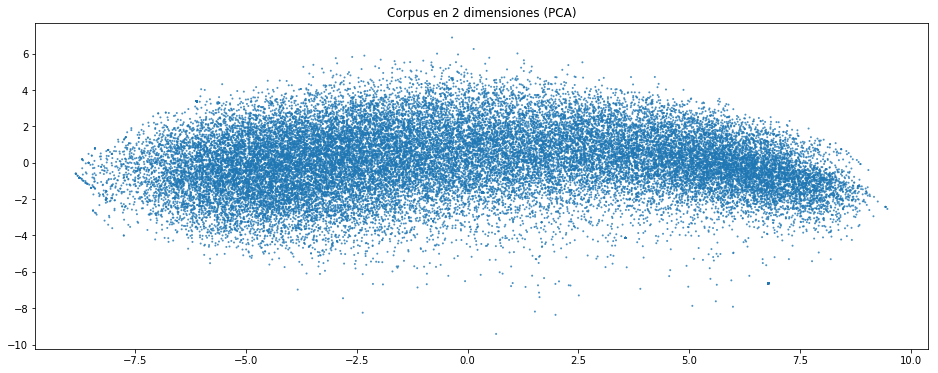

In [2]:
# Script PCA - Ejecutar antes que cualquier gráfica de PCA

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from utils.const import *
from model import pca
import processing.reader as reader
import plotting.pcaPlotting as pcaPlotting

# Leer dataset de respuestas a encuesta
candidates, dataset = reader.readDataset('../' + DATA_ENCUESTAS)

# Almacenar opciones por defecto para graficar luego
defaultOptionsPCA = {
    'pca_election': PCAOps.COVARIANZA,
    'pca_analysis': PCAnalysis.GENERAL,
    'pca_intermediates': PCAIntermediates.NONE,
    'candidate_division': CandidateDivision.PARTIES,
    'from_notebook': True
}

# Aplicar PCA para reducir a 2 dimensiones
reducedDataset, extras = pca.reduce_pca(dataset.values, 2, defaultOptionsPCA)

# Almacenamiento de variables globales para graficar luego
%store reducedDataset
%store extras
%store candidates
%store defaultOptionsPCA

# Graficar corpus en 2 dimensiones
pcaPlotting.plotPCA(reducedDataset, candidates, defaultOptionsPCA, extras)

A partir de la gráfica obtenida, se puede observar que los ejemplos se distribuyen en el intervalo $[-10,10] \subset \mathbb{R}$ en ambos ejes, en contraste con el corpus original de 26 dimensiones, del cual se sabe que las coordenadas de cada ejemplo se distribuyen en el intervalo $[1,5] \subset \mathbb{N}$.

A priori este conocimiento no indica nada trivial, por lo que se prosiguió a realizar un análisis cualitativo de estos resultados.

#### 4.4.3. Análisis cualitativo
***
En la siguiente sección se adjuntan diversos scripts para la muestra de gráficas utilizando el corpus reducido por **PCA** en la sección anterior. Más concretamente, se grafican los resultados etiquetados según las divisiones establecidas en la sección 4.2 (votantes según partido votado, votantes según posición en espectro izquierda, derecha, centro y votantes según posición en espectro progresismo, liberalismo, conservadurismo, centro).

Es importante recordar dos cosas:
- La separación de candidatos para el espectro político unidimensional y bidimensional se encuentra determinada en los archivos _data/candidatosEspectro.json_ y  _data/candidatosNolan.json_ respectivamente.
- Dicha separación es arbitraria y si bien se presume no del todo correcta (especialmente para el espectro bidimensional), se mantuvo con el fin de expandir las evaluaciones posibles.

Teniendo esto en cuenta, se adjunta un script por cada división:

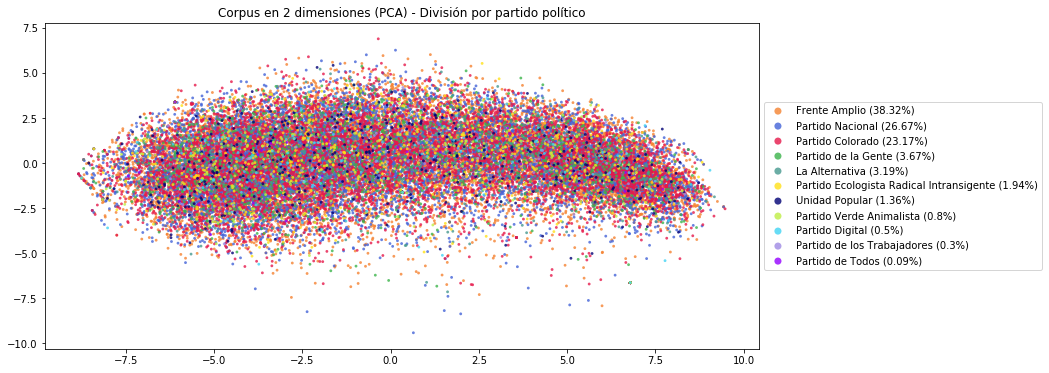

In [3]:
# Gráfica PCA - División por partido político
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.ALL_PARTY
options['candidate_division'] = CandidateDivision.PARTIES
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

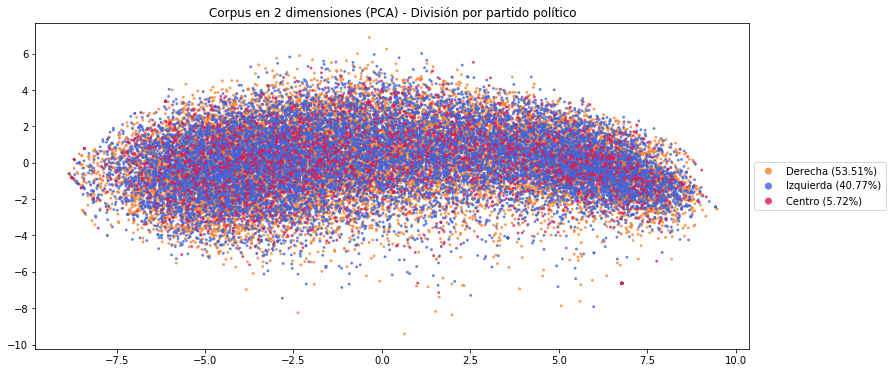

In [4]:
# Gráfica PCA - División por espectro político unidimensional (izquierda, derecha, centro)
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.ALL_PARTY
options['candidate_division'] = CandidateDivision.SPECTRUM
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

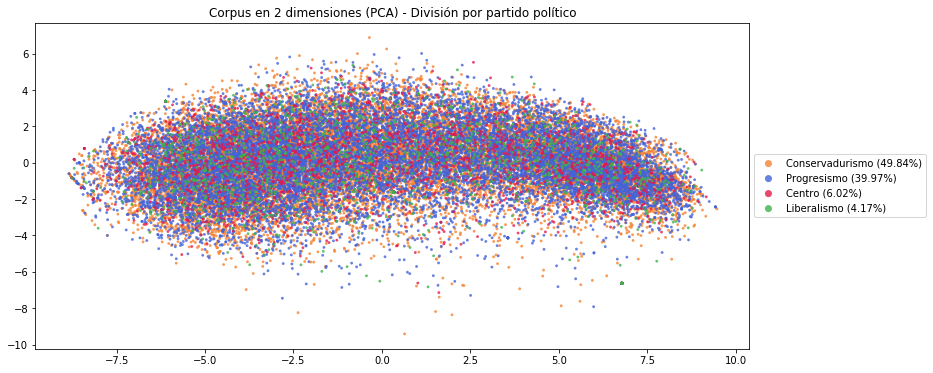

In [5]:
# Gráfica PCA - División por espectro político bidimensional (progresismo, liberalismo, conservadurismo, centro)
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.ALL_PARTY
options['candidate_division'] = CandidateDivision.NOLAN
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

Independientemente a la gráfica que se observe, no se puede encontrar ningún patrón discernible en la distribución de los datos, por lo que existen dos posibles conclusiones:
- No existe un patrón discernible por el ojo humano en el corpus de datos.
- La reducción de dimensionalidad en el corpus original provoca una pérdida de información demasiado importante como para mantener los patrones del corpus original.

Es importante destacar que si bien ambas conclusiones son opuestas, es posible que la realidad posea parte de ambas, es decir, que el patrón en el conjunto original sea difícil de discernir y a su vez la pérdida de información sea crucial.

En la siguiente sección se evalúa la idoneidad del corpus para la ejecución de **PCA**, es decir, que tanto impacto tiene la reducción de dimensionalidad en el conjunto original y si esto está relacionado con la imposibilidad de encontrar un patrón en el corpus reducido.

#### 4.4.4. Evaluación
***
Primeramente, resulta de interés observar el comportamiento de los **valores propios** obtenidos de la **matriz de covarianza**. Dichos valores propios aportan información interesante del corpus original. Se destacan ciertas nociones de álgebra lineal y su relación con **PCA**:
- Si todos los valores propios tienen magnitud muy similar, es un indicador de que el dataset ya está en un "buen" subespacio, en el sentido de proporción de información aportada por cada dimensión. Sin embargo, esto también significa que reducir dimensiones reducirá la información con un orden lineal, dado que cada vector propio aporta información por igual al conjunto.
- Si algunos valores propios tienen un orden de magnitud mayor al resto, estos son buenos candidatos para conservar en PCA.
- Si algunos valores propios tienen un valor cercano a 0, estos son buenos candidatos para descartar en PCA, dado que la ganancia de información de los mismos es casi nula.

Teniendo esto en cuenta, se adjunta a continuación un script que contrasta los valores de los **26 valores propios** de la **matriz de covarianza** calculada en **PCA**:

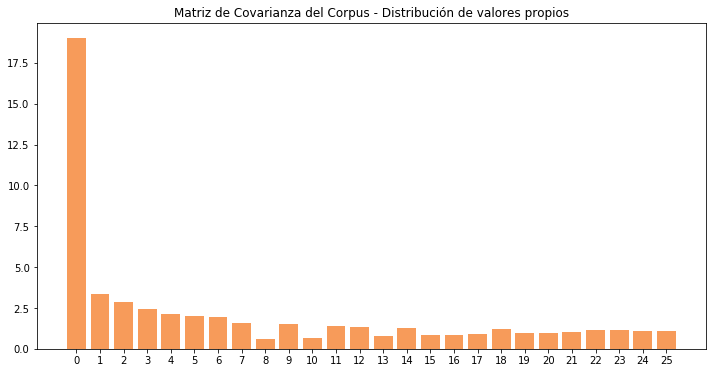

In [6]:
# Gráfica PCA (Resultados Intermedios) - Distribución de Valores Propios
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.NONE
options['pca_intermediates'] = PCAIntermediates.EIGEN_VALUES
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

Observando los resultados y teniendo en cuenta las nociones mencionadas, se puede observar lo siguiente:
- El **componente principal** de la matriz es un valor propio cuyo orden de magnitud es considerablemente mayor al resto.
- El resto de los **valores propios** tiene un orden de magnitud similar entre sí.
- El **componente principal** (19) no es descomunalmente grande en comparación al resto de valores. Si bien la información que su vector contiene es ciertamente mayor, la suma del resto de los valores propios es de **35.12**, por lo que descartarlos conlleva a una considerable perdida de información.

Teniendo en cuenta dichas observaciones, se interpreta lo siguiente:
- El conjunto original en sus **26 dimensiones** no necesariamente se encuentra en un "buen" espacio, dada la diferencia de magnitud con el **componente principal**.
- A partir de una dimensión, si bien la perdida de información al agregar más dimensiones no es lineal, el orden de magnitud entre el resto de los **valores propios** es suficientemente similar como para que tomar sólo dos dimensiones siga implicando una gran perdida de información.

En resumen, se cuenta con la intuición de que la reducción a 2 dimensiones no engloba una suficiente proporción de la información original como para mantener los patrones. Para bajar más a tierra dicha noción se adjunta a continuación un script que calcula el **ratio de varianza explicado** para cada posible cantidad de componentes a tomar:

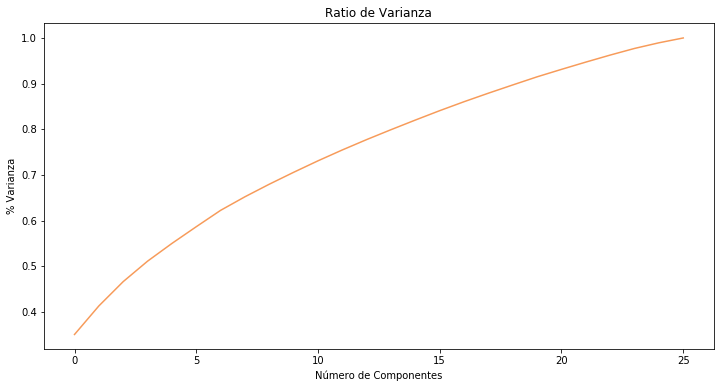

In [7]:
# Gráfica PCA (Resultados Intermedios) - Ratio de Varianza Explicado
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.NONE
options['pca_intermediates'] = PCAIntermediates.VARIANCE_RATIO
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

Estos resultados respaldan las interpretaciones realizadas en la sección anterior, y a su vez, permiten generar otras observaciones interesantes:
- Efectivamente, al tomar sólo dos dimensiones se pierde un **59.7%** de la información original.
- Debido a que la curva crece de forma similar a medida que crece la cantidad de componentes, es complejo elegir una cantidad de componentes idónea para reducir la dimensionalidad.
- No obstante, se determinaron ciertos candidatos, como por ejemplo:
    - $k = 8$, con un **34.8%** de perdida de información.
    - $k = 14$, con un **20.1%** de perdida de información.
- Sin embargo ninguna de estas dimensiones tiene una clara representación gráfica y tampoco se puede garantizar que formen subconjuntos claramente definidos para cada clasificación.
    
En resumen, el **ratio de varianza explicado** para 2 dimensiones parece confirmar el hecho de que la pérdida de información es demasiada como para encontrar patrones gráficamente. No obstante, no permite asegurar ni negar la existencia de dichos patrones en el corpus original.

Con el objetivo de estudiar el corpus original, se adjunta a continuación un script que muestra la **matriz de covarianza** como un mapa de calor:

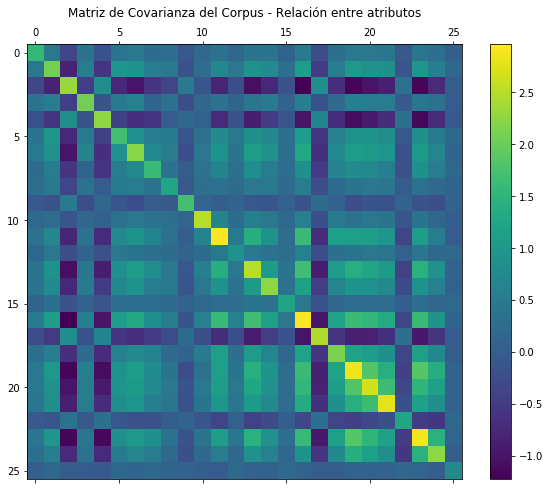

In [8]:
# Gráfica PCA (Resultados Intermedios) - Matriz de Covarianza (Mapa de Calor)
options = defaultOptionsPCA.copy()
options['pca_analysis'] = PCAnalysis.NONE
options['pca_intermediates'] = PCAIntermediates.COV_MATRIX
pcaPlotting.plotPCA(reducedDataset, candidates, options, extras)

A partir de estos resultados se pueden realizar observaciones sobre la **varianza** y **covarianza** de respuestas a determinadas preguntas.

Primeramente, se puede observar que en la diagonal de la matriz se encuentra la **varianza** de cada atributo, destacándose las mayores varianzas para las preguntas 11, 16 y 23, mientras que las menores son para las preguntas 12, 15 y 25. Esto indica que las preguntas con menor varianza suelen ser respondidas más similarmente que las que tienen mayor varianza.

Por otra parte, se analizaron ciertas preguntas en concreto en base a su **covarianza**:

**Las preguntas (2, 4, 17 y 22):**
- Debería aumentar la carga de impuestos para los ricos.
- La ley de inclusión financiera es positiva para la sociedad.
- Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años.
- La separación de estado y religión me parece importante.

Tienen una relación negativa con una gran cantidad de preguntas, pero positiva o neutral entre sí. Se observa que:
- Las personas que respondieron alto a una de esas preguntas tienden a responder alto a las otras y viceversa.
- Las personas que respondieron alto a estas preguntas tienden a responder bajo a una cantidad considerable de otras preguntas y viceversa.

**Las preguntas (19, 20 y 23):**
- El feminismo moderno no busca la igualdad sino el poder.
- La ley trans fue un error.
- La legalización de la marihuana fue un error.

Son las que tienen la mayor covarianza positiva entre sí. Se observa que:
- Las personas que respondieron alto a una de estas tienden a responder alto en las otras y viceversa.

**Las preguntas (11, 13 y 16):**
- La pena de muerte debería ser una opción para los crímenes más serios.
- Las FF.AA. deberían tener un rol activo en la seguridad pública.
- Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años.

Tienen covarianza positiva entre sí. Se observa que:
- Las personas que respondieron alto a una de estas tienden a responder alto en las otras y viceversa.

Cerrando este análisis, se puede ver una relación conceptual entre las preguntas y sus posibles respuestas. En general, aquellas personas que responden de cierta forma en las preguntas 2, 4, 17 y 22, suelen responder de forma distinta en la mayoría de las otras preguntas, mientras que las personas que responden de cierta forma a las preguntas 19,20 y 23 y en menor medida a las preguntas 11, 13 y 16, suelen responder de forma muy similar entre ellas.

Juntando esta información, se puede agrupar tendencias según su posición (acuerdo o desacuerdo) en relación con **políticas sociales** inclusivas como la ley trans, fomentar el feminismo y legalizar la marihuana. También en materias de **políticas de seguridad**, como el rol de las Fuerzas Armadas, la pena de muerte y la baja de la edad de imputabilidad agrupan tendencias con posiciones similares.

Como apreciación cualitativa arbitraria, se identifica que los **sectores progresistas** posiblemente estén en desacuerdo con las preguntas planteadas, mientras que los **sectores conservadores** si están en acuerdo.

Por otra parte, las preguntas con covarianza negativa, especialmente las preguntas 2 y 4 que refieren a políticas económicas sobre la inclusión financiera y la carga impositiva en clases altas, mantienen la apreciación anteriormente realizada, ya que se identifica que los **sectores progresistas** posiblemente estén de acuerdo con las preguntas planteadas, mientras que los **sectores conservadores** estén en desacuerdo. 

#### 4.4.5. Interpretaciones generales
***

Considerando los resultados de PCA obtenidos y englobando las interpretaciones de cada sección:
- En el corpus original **existen** patrones o relaciones entre votantes con opiniones similares en ciertos temas
- En el corpus reducido por **PCA**, no parece haber algún tipo de asociación entre las dos dimensiones a las que se redujo el conjunto y los resultados posibles de cada ejemplo del mismo.
- Esta carencia de asociación en la distribución obtenida junto al hecho de haber encontrado patrones en el corpus original, es un posible indicador de que la información perdida por reducir la dimensionalidad es increíblemente alta para este conjunto.
- Esto puede deberse a que la realidad representada por el conjunto es demasiado compleja como para reducir su dimensionalidad, al menos a dos dimensiones. Esto es respaldado por la **curva del ratio de varianza**, debido a la información no despreciable que aportan el resto de los vectores propios, la perdida de información a reducir a dos dimensiones es demasiado alta.

### 4.5. Análisis - Aprendizaje no Supervisado (Clustering)
***

#### 4.5.1. Proceso
***
Como se mencionó en anteriores secciones, el objetivo de generar clusters es encontrar posibles patrones en dichos agrupamientos.

Con este conocimiento, se encaró la experimentación de la siguiente manera:
1. Se ejecutó **K-Means** sobre el corpus, generando $k$ clusters para $k=2,3,5,10$, utilizando $10$ ejecuciones para cada $k$ y almacenando el clustering con mejor **coeficiente de Silhouette**.
2. Se evaluó la distribución de candidatos graficándola para cada cluster con $k=2,3,5,10$.
3. Se evaluó la distribución de partidos graficándola para cada cluster con $k=11$, calculando a su vez el ARI entre las etiquetas del corpus y de los partidos en cuestión.
4. Se evaluó la distribución de grupos del espectro bidimensional graficándola para cada cluster con $k=5$, calculando a su vez el ARI entre las etiquetas del corpus y de los grupos en cuestión.
5. Se evaluó la distribución de grupos del espectro unidimensional graficándola para cada cluster con $k=2$, calculando a su vez el ARI entre las etiquetas del corpus y de los grupos en cuestión.

A continuación, se desglosan las cinco etapas:

#### 4.5.2. Resultados
***
A continuación se adjunta un script que ejecuta **K-Means** sobre el corpus, graficando la distribución de ejemplos por cluster y almacenado globalmente los resultados. Es **necesario** ejecutarlo antes de ejecutar cualquier script de las siguientes subsecciones.

K-Means - Inicio de ejecución

-> Iteración N° 0
-> Iteración N° 1
-> Iteración N° 2
-> Iteración N° 3
-> Iteración N° 4 - Convergencia (Varianza = 188609.37175963345)

K-Means - Fin de ejecución

Stored 'dataset' (DataFrame)
Stored 'candidates' (Series)
Stored 'centroids' (dict)
Stored 'classes' (dict)
Stored 'defaultOptionsKM' (dict)


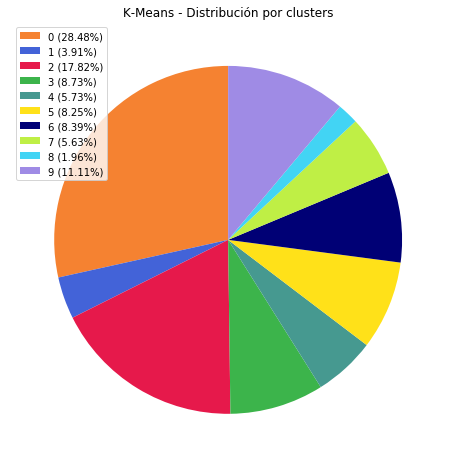

In [10]:
# Script K-Means - Ejecutar antes que cualquier gráfica de K-MEANS
# IMPORTANTE: Los parámetros k y executions son modificables por el usuario

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from utils.const import *
from model import k_means
import processing.reader as reader
import plotting.kMeansPlotting as kMeansPlotting

# Cantidad de clusters en los que partir (EJ: 2,3,5,10)
k = 10

# Cantidad de ejecuciones de K-Means (de ser mayor a 1, calcula para cada una el coeficiente de Silhouette
# y guarda aquel conjunto de clusters con el coeficiente más alto)
## Advertencia: Silhouette demora segundos en ejecutar.
executions = 1

# Leer dataset de respuestas a encuesta
candidates, dataset = reader.readDataset('../' + DATA_ENCUESTAS)

# Almacenar opciones por defecto para graficar luego
defaultOptionsKM = {
    'kmeans_iters': executions,
    'kmeans_analysis': KmeansAnalysis.GENERAL,
    'kmeans_evaluations': KmeansEvaluations.NONE,
    'candidate_division': CandidateDivision.PARTIES,
    'from_notebook': True
}

print('K-Means - Inicio de ejecución')

# Aplicar K-Means
centroids, classes = k_means.k_means(dataset, k, defaultOptionsKM, candidates)

print('K-Means - Fin de ejecución')
print()

%store dataset
%store candidates
%store centroids
%store classes
%store defaultOptionsKM

kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, defaultOptionsKM)

Ejecutando el script anterior para valores de $k : k = 2,3,5,10$ y corriendo para cada $k$ **10 ejecuciones distintas** con el objetivo de tomar el mejor clustering, se obtuvieron los siguientes **coeficientes de Silhouette**:
- Para $k=2$, $\textbf{0.23}$ aproximadamente.
- Para $k=3$, $\textbf{0.13}$ aproximadamente.
- Para $k=5$, $\textbf{0.10}$ aproximadamente.
- Para $k=10$, $\textbf{0.08}$ aproximadamente.

Teniendo dichos coeficientes en cuenta, se interpreta que para el corpus dado, el mejor clustering posible es aquel que genera **2 clusters** para todo el conjunto de datos. A priori se desconoce si existe algun patrón en relación a tal separación y a todas las demás, por lo que se procedió a realizar un análisis cualitativo de los resultados.

#### 4.5.3. Análisis cualitativo
***
En la siguiente sección se adjuntan diversos scripts para la muestra de gráficas utilizando distintos clusterings generados por el script anterior. Más concretamente, se grafican para cada cluster las divisiones establecidas en la sección 4.2 (votantes según candidato votado, votantes según partido votado, votantes según posición en espectro progresismo, liberalismo, conservadurismo, centro y votantes según posición en espectro izquierda, derecha, centro).

Es importante recordar dos cosas:
- La separación de candidatos para el espectro político unidimensional y bidimensional se encuentra determinada en los archivos data/candidatosEspectro.json y data/candidatosNolan.json respectivamente.
- Dicha separación es arbitraria y si bien se presume no del todo correcta (especialmente para el espectro bidimensional), se mantuvo con el fin de expandir las evaluaciones posibles.

Teniendo esto en cuenta, el primer script grafica la división de **candidatos** por cluster.

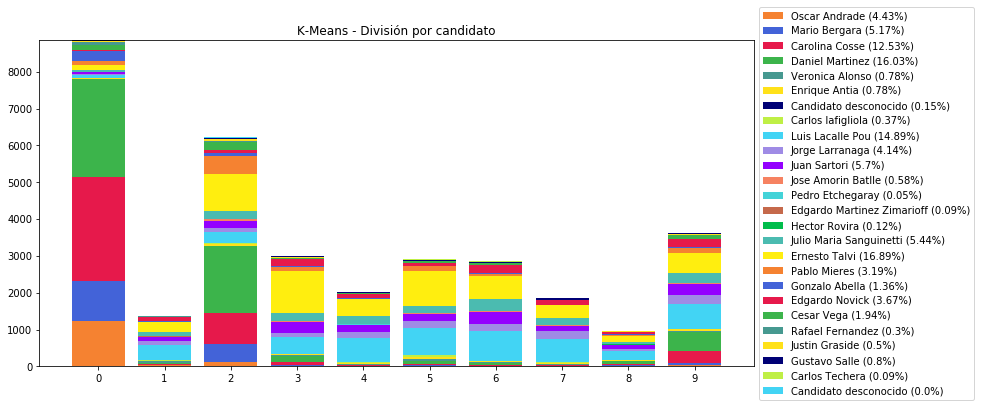

In [11]:
# Gráfica KMeans - División por candidato
options = defaultOptionsKM.copy()
options['kmeans_analysis'] = KmeansAnalysis.CANDIDATES
kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, options)

Dada la enorme cantidad de clasificaciones (24 candidatos), es difícil apreciar conclusiones e interpretaciones de esta grafica para cualquier valor de $k$. Es por esto, que se refina el análisis con generalizaciones para cada clase. Con este objetivo, se adjunta a continuación un script que muestra la división en clusters de cada **partido político**:

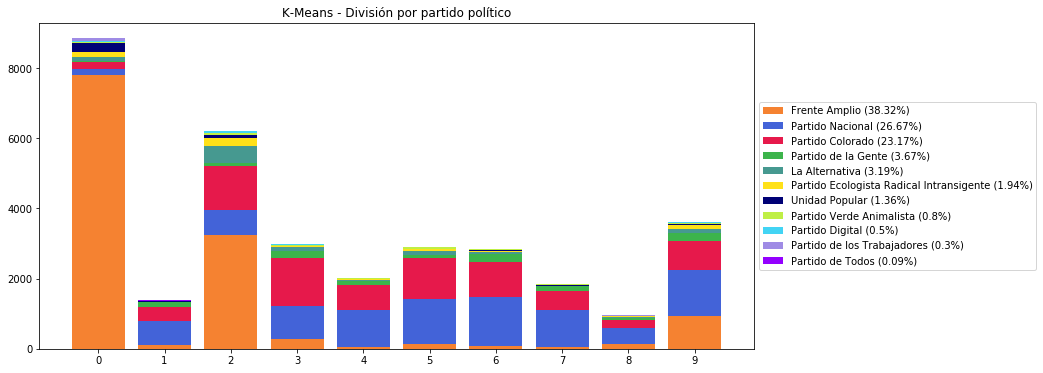

In [12]:
# Gráfica KMeans - División por partido político
options = defaultOptionsKM.copy()
options['kmeans_analysis'] = KmeansAnalysis.PARTIES
options['candidate_division'] = CandidateDivision.PARTIES
kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, options)

**Para el caso de $k = 2$**

Se obtuvo el resultado cuyos clusters más marcan una diferencia respecto a las clasificaciones de cada ejemplo. Si bien nunca se pudo alcanzar una separación perfecta, siempre se llegó a una separación razonable entre partidos opuestos, encontrándose el *Frente Amplio* y la *Unidad Popular* contra el *Partido Nacional*, el *Partido Colorado* y el *Partido de la Gente* (lo cual tiene sentido dado pertenecen a espectros similares entre sí).

**Para el caso de $k = 3,5,10$**

Al escalar la cantidad de conjuntos a los cuales agrupar, se observa que en lugar de refinar grupos cuya densidad era poco uniforme (por ejemplo el cluster que contiene al *Partido Independiente* y al *Partido Colorado* para $k = 2$), el resultado obtenido son sub-divisiones con similar densidad de clusters generados previamente.

Con el objetivo de refinar aún más el análisis y encontrar patrones en los clusters obtenidos, se adjunta a continuación un script que muestra la división en clusters de cada **grupo del espectro bidimensional**:

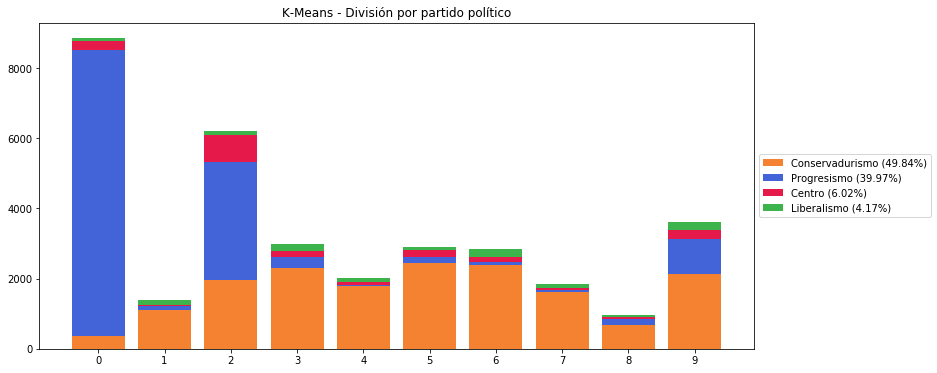

In [13]:
# Gráfica KMeans - División por espectro bidimensional (conservadurismo, progresisimo, liberalismo, centro)
options = defaultOptionsKM.copy()
options['kmeans_analysis'] = KmeansAnalysis.PARTIES
options['candidate_division'] = CandidateDivision.NOLAN
kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, options)

**Para el caso de $k = 2$**

Se observa que efectivamente la agrupación para dos clusters logra separar bastante bien los espectros ideológicos de **conservadurismo** y **liberalismo** de **progresismo**. El hecho de que los candidatos conservadores y liberales se agrupen está fuertemente relacionado a la clasificación sesgada mencionada anteriormente, ya que ambos representan partidos de derecha.

**Para el caso $k = 3$**

Una observación muy interesante es que si bien dos de los clusters generados agrupan una gran concentración de solamente ejemplos clasificados como **progresismo* y **consdervadurismo**, el cluster restante agrupa elementos indiferentemente de su clasificación.

**Para el caso $k = 5, 10$**

Se observa que al aumentar $k$ los conjuntos con mayor proporción de **conservadurismo** son cada vez más "puros". Este mismo hecho también se cumple para el grupo **progresismo**, por lo que podría tener sentido agrupar ciertos clusters tras finalizado el algoritmo. No obstante, un resultado bastante similar ya se obtenia con $k = 2$. Esto respalda la observación de que los conjuntos previos se están subdividiendo entre sí sin formar mejores refinaciones del espacio de clasificación.

Tomando en cuenta los patrones encontrados en esta división, se adjunta a continuación un script que muestra la división en clusters de cada grupo del espectro **unidimensional:**

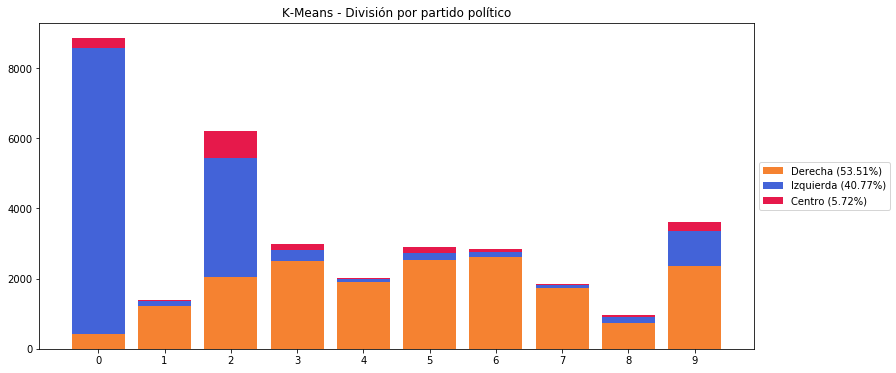

In [14]:
# Gráfica KMeans - División por espectro unidimensional
options = defaultOptionsKM.copy()
options['kmeans_analysis'] = KmeansAnalysis.PARTIES
options['candidate_division'] = CandidateDivision.SPECTRUM
kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, options)

Independiente al caso, se puede observar que los resultados son sumamente similares a la gráfica anterior. De hecho, si se establece el paralelismo **progresismo - izquierda** y **conservadurismo, liberalismo - derecha**, se puede ver que los resultados

#### 4.5.4. Evaluación del valor de ARI
***

A continuación se evalúan los casos de $k=2,3,5,11$ asociando cada una a las divisiones por espectros (unidimensional y bidimensional) y la división por partidos.

Debido a que para el cálculo de ARI es esencial trabajar con asociaciones especificas de estos casos se presenta un script adicional de ejecución.


Entrenamiento N° 1
-> Iteración N° 0
-> Iteración N° 1
-> Iteración N° 2 - Convergencia (Varianza = 204049.87605114945)

Coeficiente Silhouette N° 1: 0.08939447472505159

Entrenamiento N° 2
-> Iteración N° 0
-> Iteración N° 1
-> Iteración N° 2
-> Iteración N° 3 - Convergencia (Varianza = 199368.55154180015)

Coeficiente Silhouette N° 2: 0.11015454463725048

Mejor modelo: N° 2
Mejor coeficiente silhouette: 0.11015454463725048

Adjusted Random Index (ARI): 0.0001527242170445686

Fin de K-Means

Graficando división por partido


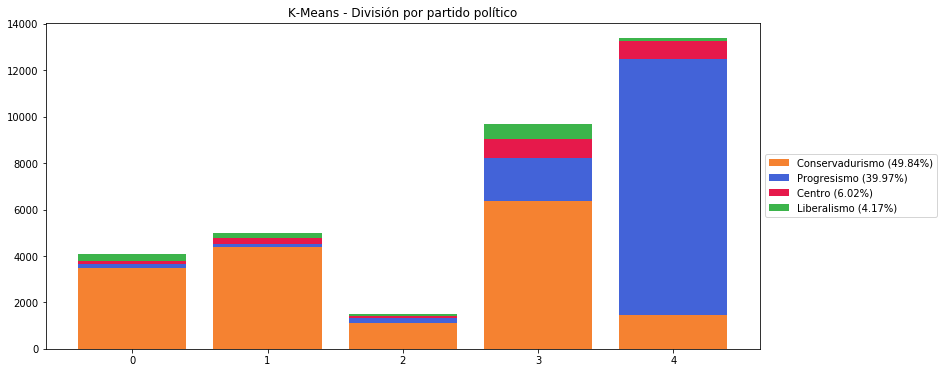

In [27]:
executions = 2
k = 5 # 2, 3, 5, 11

options = defaultOptionsKM.copy()
options['kmeans_iters'] = executions
options['kmeans_evaluations'] = KmeansEvaluations.ARI
options['kmeans_analysis'] = KmeansAnalysis.PARTIES

if k == 2:
    options['candidate_division'] = CandidateDivision.SPECTRUM
elif k == 3:
    options['candidate_division'] = CandidateDivision.SPECTRUM
elif k == 5:
    options['candidate_division'] = CandidateDivision.NOLAN
elif k == 11:
    options['candidate_division'] = CandidateDivision.PARTIES

if k == 2 or k ==3 or k == 5 or k == 11:
    # Aplicar K-Means
    centroids, classes = k_means.k_means(dataset, k, options, candidates)

    kMeansPlotting.plotKMeans(dataset, candidates, centroids, classes, options)

#### 4.5.5. Interpretaciones generales
***

Respecto a las agrupaciones en partidos:
- Se presume que la razón por la cual los conjuntos que agrupaban ejemplos que clasificaban con candidatos del *Partido Nacional* también agrupaban ejemplos cuya clasificación eran candidatos del *Partido Colorado* es debido a que las respuestas a preguntas que clasificaron con algunos candidatos del *Partido Nacional* son muy similares a las que clasificaron con algunos candidatos del *Partido Colorado*. Esta conjetura es razonablemente respaldada dado que nunca se pudo alcanzar una buena separación de estos entre sí (Nisiquiera para $k = 3$ que era el valor candidato para alcanzar este resultado).
- Se presume que la razón de que los partidos menos populares quedaran desperdigados por todos los clusters puede en gran parte deberse a que por la baja ocurrencia de estos ejemplos (o a causa del ruido en los datos), la IA de *aquienvoto.uy* no haya podido identificar del todo las respuestas que consistentemente se identifiquen con candidatos de dichos partidos.
- Incrementar $k$ fue algo que perdió valor mucho más rápido de lo que se esperaba, para ninguno de los casos en la experimentación se pudo alcanzar una mejor clasificación que con $k=2$ debido al fenómeno de que los nuevos clusters generados acababan siendo subdivisiones de similar densidad a clusters anteriores (en lugar de refinaciones de los mismos).

## 5. Conclusiones
***
#### 5.1. Respecto a los Datos
***
- La política es una ciencia social y por lo tanto, está lejos de ser exacta. Existen múltiples variables a tomar en cuenta al momento de hacer interpretaciones sobre cualquier conjunto de datos, siendo altamente probable la presunción de hipótesis incorrectas.
- Definir un conjunto de preguntas tendenciosas puede sesgar la generación de grupos y la asignación de candidatos a votantes.
- Definir respuestas numéricas ante preguntas de materias muy generales no sólo simplifica excesivamente un fenómeno tan complejo como la ideología política, sino que también asume que el sujeto en cuestión cuenta con los conocimientos necesarios para responder acorde a su ideología.

#### 5.2. Respecto a los Resultados
***
- La reducción de dimensionalidad puede resultar útil en ciertos conjuntos de datos, pero en este caso se perdió demasiada información y por lo tanto fue imposible determinar algún patrón.
- Por otra parte, el clustering demostró resultar de utilidad y separar en clusters con proporciones distintas de cada grupo político. No obstante, la separación estuvo lejos de ser 100% acertada. Este hecho puede ser un indicador de que el modelo no es lo suficientemente bueno para el conjunto de datos, o que el espectro de separación es más complejo de lo que se determinó
- El separar en grupos conceptuales y asignar a cada candidato un grupo arbitrariamente, particularmente los del espectro político, puede haber influido negativamente en el análisis, ya que puede haber sesgado incorrectamente cierto grupo

## 6. Referencias
***
[1] **Teoría analítica de la política** - *Melvin J. Hinich y Michael C. Munger* (2003)

[2] **Un centro vacío de candidatos: evaluando modelos espaciales para las elecciones presidenciales en Uruguay** - *Juan Andrés Moraes y Diego Luján (2016)*

[3] **The Political Spectrum: A Bi-Dimensional Approach** - *Maurice Bryson y William McDill* (1968)